In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
name = 'ALIOR-BANK'

In [2]:
df = pd.read_html('https://www.biznesradar.pl/raporty-finansowe-rachunek-zyskow-i-strat/'+name+',Q')[-3].drop([
                                                                                0,1,8,9,10,11,14,15,16,18,20]).set_index('Unnamed: 0')
shares = pd.read_html('https://www.biznesradar.pl/wskazniki-wartosci-rynkowej/'+name)[0].drop([0,2,3,4,5,6,7,8,9]).set_index('Unnamed: 0')

del df["Unnamed: "+str(len(df.columns))]  
del shares["Unnamed: "+str(len(shares.columns))] 

df = df.drop(df.columns[0:4],axis=1)
shares = shares.drop(shares.columns[0:(len(shares.columns)-len(df.columns))]   ,axis=1)
df.columns = df.columns.str.slice(start=2 , stop=7)
shares.columns = df.columns
     
for i in range(len(df.columns)):
    df[str(df.columns[i])] = df[str(df.columns[i])].str.replace('(k/k).*','')
    df[str(df.columns[i])] = df[str(df.columns[i])].str.replace('(r/r).*','')
    df[str(df.columns[i])] = df[str(df.columns[i])].str.replace(' ','')
    shares[str(shares.columns[i])] = shares[str(shares.columns[i])].str.replace(' ','')
    
#for j in range(8):
   # df.iloc[j] = pd.to_numeric(df.iloc[j], errors="coerce")
    
df = df.apply(pd.to_numeric, errors='ignore')
shares = shares.apply(pd.to_numeric, errors='ignore')
df

,13/Q1,13/Q2,13/Q3,13/Q4,14/Q1,14/Q2,14/Q3,14/Q4,15/Q1,15/Q2,...,18/Q3,18/Q4,19/Q1,19/Q2,19/Q3,19/Q4,20/Q1,20/Q2,20/Q3,20/Q4
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Przychody odsetkowe,376470,369657,387349,384690,392011,429417,455818,435829,480841,524991,...,995167,1022595,1020086,978096,1096153,964959,959577,858181,780909,734206
Koszty odsetkowe,154619,129783,117885,117318,120957,125341,134549,116470,137673,151296,...,213747,219292,216279,217172,226328,218067,183553,135340,97794,67460
Wynik z tytułu odsetek,221851,239874,269464,267372,271054,304076,321269,319359,343168,373695,...,781420,803303,803807,760924,869825,746892,776024,722841,683115,666746
Przychody prowizyjne,104150,114839,64029,192912,125281,138637,134965,134725,135582,124811,...,211495,217935,266948,286372,304500,307748,271570,292027,329428,322724
Koszty prowizyjne,48655,54598,43375,54124,41712,54820,49722,39214,42799,54485,...,104905,102641,97084,127451,131965,142494,134176,139666,160326,145735
Wynik z tytułu prowizji,55495,60241,20654,138788,83569,83817,85243,95511,92783,70326,...,106590,115294,169864,158921,172535,165254,137394,152361,169102,176989
Odpisy netto z tytułu utraty wartości kredytów,-73536,-86715,-101948,-142782,-117281,-129870,-166553,-132886,-144656,-159483,...,-244876,-299948,-274606,-502645,-324788,-341065,-294846,-985043,-291145,-295259
Ogólne koszty administracyjne,-197773,-203615,-211734,-234236,-214949,-233977,-235447,-240898,-257858,-262534,...,-411309,-407441,-512397,-393558,-371987,-352162,-481591,-394980,-407800,-380471
Zysk przed opodatkowaniem,57158,104422,34710,69085,85110,102442,87587,125988,117226,102973,...,247560,245276,184910,-13385,268376,55390,120998,-645977,138396,180133


In [5]:
class ZIS:
    def __init__(self , df):
        self.time = df.columns
        self.shares = shares.iloc[0]
        self.year = [ self.time[i] for i in range(3,len(self.time),4)]
        self.year = np.append(self.year , '20/Q4')
        self.prowizje_revenue = df.iloc[3]
        self.prowizje_costs = df.iloc[4]
        self.prowizje_score = df.iloc[5]
        self.odsetki_revenue = df.iloc[0]
        self.odsetki_costs = df.iloc[1]
        self.odsetki_score = df.iloc[2]
        self.credit_reserves = df.iloc[6]
        self.Gross_profit = df.iloc[8]
        
        self.sell_revenue = self.prowizje_revenue + self.odsetki_revenue 
        self.net_profit = df.iloc[9] ; self.net_profit_share = self.net_profit/self.shares*1000
        self.net_profit_share_year = [ np.sum(self.net_profit_share[i:i+4]) for i in range(0,len(self.net_profit_share),4) ]
        self.Revenue_year = [np.sum(self.sell_revenue[i:i+4])/1000000 for i in range(0,len(self.net_profit_share),4)] 
        
        self.Revenue_1Q = [ self.sell_revenue[i] for i in range(0,len(self.shares),4)]
        self.Revenue_2Q = [ self.sell_revenue[i] for i in range(1,len(self.shares),4)]
        self.Revenue_3Q = [ self.sell_revenue[i] for i in range(2,len(self.shares),4)]
        self.Revenue_4Q = [ self.sell_revenue[i] for i in range(3,len(self.shares),4)]
        
        self.net_profit_year_diff = [0]
        self.net_profit_year_diff = np.append(self.net_profit_year_diff, np.diff(self.net_profit_share_year)/1)
                                              #self.net_profit_share_year[0:len(self.year)-1]*100)
        
        self.gross_profit_1Q = [ self.net_profit[i] for i in range(0,len(self.shares),4)]
        self.gross_profit_2Q = [ self.net_profit[i] for i in range(1,len(self.shares),4)]
        self.gross_profit_3Q = [ self.net_profit[i] for i in range(2,len(self.shares),4)]
        self.gross_profit_4Q = [ self.net_profit[i] for i in range(3,len(self.shares),4)]
        
    def Revenues(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(411)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        plt.bar(self.time, self.prowizje_revenue/self.shares*1000)
        plt.plot(self.time, self.prowizje_score/self.shares*1000, color='firebrick', marker='o')
        self.ax.set_title('odsetki')
        plt.xticks(rotation = 50)
        self.ax = plt.subplot(412)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        plt.plot(self.time, self.prowizje_score/self.prowizje_revenue*100, linestyle='--',marker='o')
        plt.xticks(rotation = 50)
        self.ax = plt.subplot(413)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        plt.bar(self.time, self.odsetki_revenue/self.shares*1000)
        plt.plot(self.time, self.odsetki_score/self.shares*1000, color='firebrick', marker='o')
        plt.xticks(rotation = 50)
        self.ax.set_title('prowizje')
        self.ax = plt.subplot(414)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        plt.plot(self.time, self.odsetki_score/self.odsetki_revenue*100, linestyle='--',marker='o')
        plt.tight_layout(pad=2)
        plt.xticks(rotation = 50)
        self.fig = plt.figure(figsize = (15,8) , dpi=80)
        self.ax = plt.subplot(212)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax.set_ylabel('mld zł')
        plt.bar(self.year, self.Revenue_year)
        
        self.fig = plt.figure(figsize = (15,8) , dpi=80)
        self.ax = plt.subplot(221)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        plt.xticks(rotation = 50)
        self.ax2 = self.ax.twinx()
        self.ax.plot([self.time[i] for i in range(0,len(self.shares),4)] , self.Revenue_1Q)
        self.ax.plot([self.time[i] for i in range(0,len(self.shares),4)] , self.gross_profit_1Q)
        
        self.ax2.plot([self.time[i] for i in range(0,len(self.shares),4)] 
                      ,[ self.gross_profit_1Q[i]/self.Revenue_1Q[i]*100 for i in range(0,len(self.Revenue_1Q))],linestyle='--')
        
        self.ax = plt.subplot(222)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        plt.xticks(rotation = 50)
        self.ax2 = self.ax.twinx()
        self.ax.plot([self.time[i] for i in range(1,len(self.shares),4)] , self.Revenue_2Q)
        self.ax.plot([self.time[i] for i in range(1,len(self.shares),4)] , self.gross_profit_2Q)
        
        self.ax2.plot([self.time[i] for i in range(1,len(self.shares),4)] 
                      , [ self.gross_profit_2Q[i]/self.Revenue_2Q[i]*100 for i in range(0,len(self.Revenue_2Q))],linestyle='--')
        
        self.ax = plt.subplot(223)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        plt.xticks(rotation = 50)
        self.ax2 = self.ax.twinx()
        self.ax.plot([self.time[i] for i in range(2,len(self.shares),4)] , self.Revenue_3Q)
        self.ax.plot([self.time[i] for i in range(2,len(self.shares),4)] , self.gross_profit_3Q)
    
        self.ax2.plot([self.time[i] for i in range(2,len(self.shares),4)] 
                      , [ self.gross_profit_3Q[i]/self.Revenue_3Q[i]*100 for i in range(0,len(self.Revenue_3Q))],linestyle='--')

        
        self.ax = plt.subplot(224)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        plt.xticks(rotation = 50)
        self.ax2 = self.ax.twinx()
        self.ax.plot([self.time[i] for i in range(3,len(self.shares),4)] , self.Revenue_4Q)
        self.ax.plot([self.time[i] for i in range(3,len(self.shares),4)] , self.gross_profit_4Q)
        
        self.ax2.plot([self.time[i] for i in range(3,len(self.shares),4)] 
                      , [ self.gross_profit_4Q[i]/self.Revenue_4Q[i]*100 for i in range(0,len(self.Revenue_4Q))],linestyle='--')
        self.fig.tight_layout(pad=3)
        
    def credits(self):
        self.fig = plt.figure(figsize = (20,18) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax.set_title('Total revenue / Credits reserves')
        plt.plot(self.time, self.sell_revenue/np.absolute(self.credit_reserves))
        plt.xticks(rotation = 50)

    def earnings(self):
        self.fig = plt.figure(figsize = (20,18) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax.set_title('Earnings per share [zł]')
        self.polynomial_coeff = np.polyfit([i for i in range(0,len(self.time))], self.net_profit_share, 1)
        self.curve = np.polyval(self.polynomial_coeff, [i for i in range(0,len(self.time))])
       
        self.net_profit_mean = [ np.sum(self.net_profit_share[0:i])/i
                   for i in range(1,len(self.net_profit)+1) ] 
        self.variance = [np.sum(self.net_profit_share[0:i]-self.net_profit_mean[i])**2/(i+1) for i in range(0,len(self.net_profit_share)) ]
        self.sd = np.sqrt(self.variance)

        plt.vlines(x=self.time , ymin =0 ,ymax = self.net_profit_share , color='lime', linewidth=2) 
        plt.scatter(self.time , self.net_profit_share , s =100 , color = 'lime')
        plt.plot(self.time , self.net_profit_mean , color= 'darkviolet')
        plt.fill_between(self.time , self.net_profit_mean -self.sd , self.net_profit_mean+self.sd , alpha=0.3)
        plt.plot(self.time, self.curve)
    
        plt.xticks(rotation = 50)
        plt.yticks(fontsize = 12)
        self.ax=plt.subplot(212)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        
        j = 4
        while(j<=len(self.shares)):
            self.coefficients = np.polyfit([j-4,j-3,j-2,j-1], self.net_profit_share[j-4:j], 1)
            self.coefficients_mean = np.polyfit([j-4,j-3,j-2,j-1], self.net_profit_mean[j-4:j], 1)
            self.curve = np.polyval(self.coefficients,[j-4,j-3,j-2,j-1])
            self.curve_mean = np.polyval(self.coefficients_mean,[j-4,j-3,j-2,j-1])
            if self.coefficients[0]<=0:
                self.color = 'red'
            else:
                self.color = 'green'
            plt.plot(self.time[j-4:j], self.curve, color=self.color)
            plt.plot(self.time[j-4:j], self.curve_mean, color='black')
            j = j+1
        plt.xticks(rotation = 50)
        
        
        
    def earnings_year(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax.set_title('Earnings per share [zł]')
        self.ax2 = self.ax.twinx()
        self.ax.vlines(x=self.year , ymin =0 ,ymax = self.net_profit_share_year , color='lime',alpha=0.5, linewidth=4) 
        self.ax.scatter(self.year , self.net_profit_share_year , s =65 , color = 'lime')

        self.net_profit_mean_year = [ np.sum(self.net_profit_share_year[0:i])/i
                   for i in range(1,len(self.net_profit_share_year)+1) ] 
        self.variance_year = [np.sum(self.net_profit_share_year[0:i]-self.net_profit_mean_year[i])**2/(i+1) 
                              for i in range(0,len(self.net_profit_share_year)) ]
        self.sd_year = np.sqrt(self.variance_year)
        
        self.ax.plot(self.year , self.net_profit_mean_year,color='navy')
        self.ax.fill_between(self.year , self.net_profit_mean_year -self.sd_year , self.net_profit_mean_year+self.sd_year , alpha=0.3 )
        self.ax2.plot(self.year, self.net_profit_year_diff, linestyle='--')
        plt.xticks(rotation = 50)
        plt.yticks(fontsize = 12)
        
    def tax(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.spines["bottom"].set_visible(False)
        self.ax.spines["left"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        
        plt.plot(self.time , (100 - self.net_profit/self.Gross_profit*100) )
        plt.axhline( np.mean((100 - self.net_profit/self.Gross_profit*100)) , linestyle ='--')
        plt.xticks(rotation = 50)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

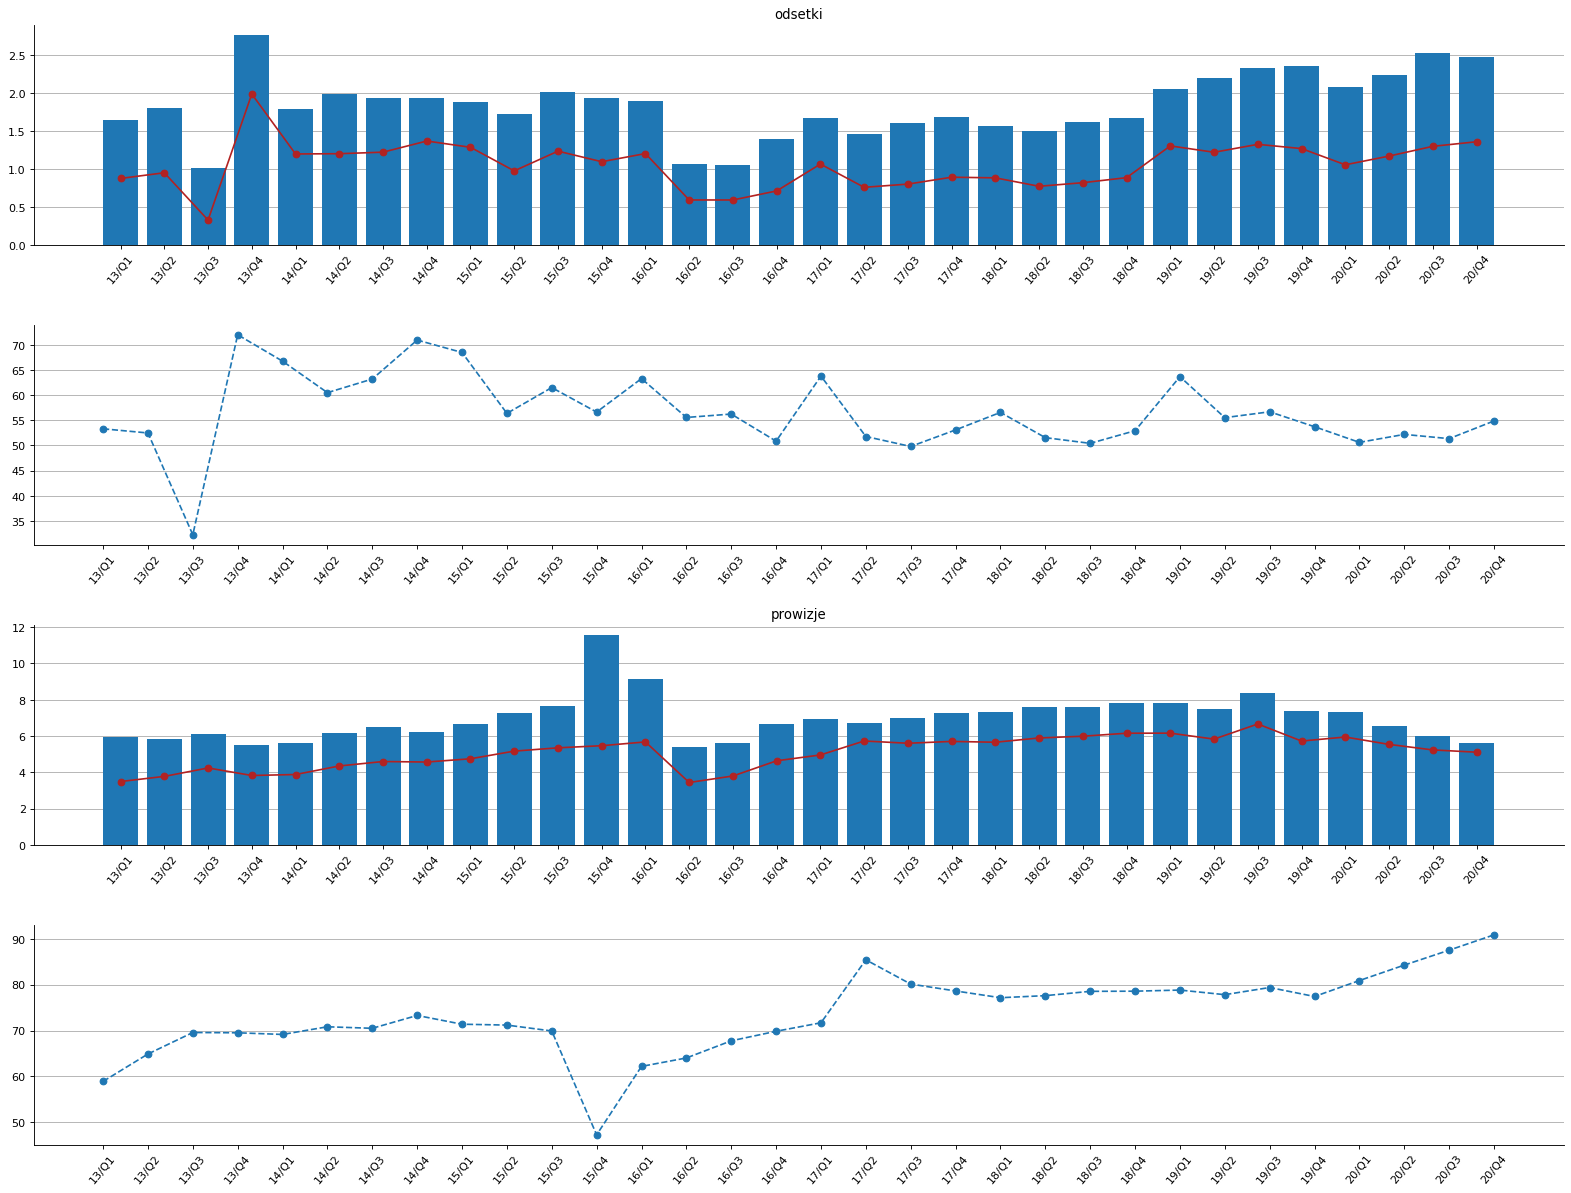

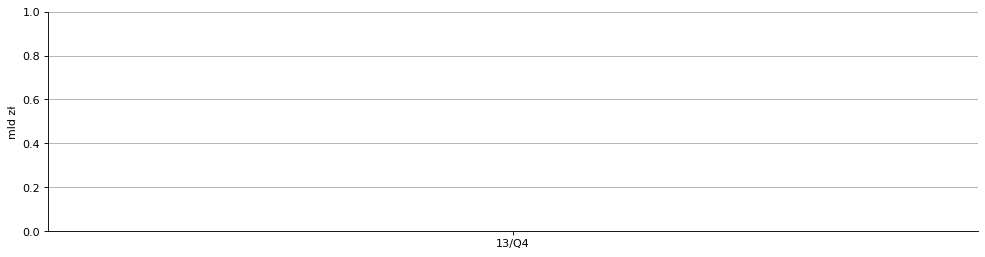

In [6]:
fin = ZIS(df) 
display(fin.Revenues())
# display(fin.credits())
display(fin.earnings())
display(fin.earnings_year())
display(fin.tax())